# Mini-projeto - MNIST

## Classificação de dígitos manuscritos do MNIST

Para este mini-projeto da disciplina eletiva de Redes Neurais (código IF702) serão feitos experimentos com a rede neural desenvolvida por Michael Nielsen e disponível no GitHub através do link https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/src/network.py .

Para este projeto foram consultadas as insruções do livro disponível em http://neuralnetworksanddeeplearning.com/ também escrito por Michael Nielsen.

Uma última ressalva é que este programa foi modificado para ser compatível com Python em sua versão 3, pois como veremos na linha abaixo, a versão na qual o programa será executado será a distribuição Python da Intel(R) para maior ganho de performance. Para isto foram feitos pequenos ajustes na sintaxe e na biblioteca cPickle, que agora é a _pickle no código onde ocorre a exportação das imagens do arquivo compactado mnist.pkl.gz. Além dessas modificações para python3 ainda houve uma modificação a respeito do rastreamento da acurácia por classe, que foi requisitado pelo prof da disciplina, Germano C. Vasconcelos.

## Dia 1:

In [1]:
import sys
print(sys.version)

3.6.8 |Intel Corporation| (default, Mar  1 2019, 00:10:45) 
[GCC 4.8.2 20140120 (Red Hat 4.8.2-15)]


Agora, partindo para a ação vou deixar o código modificado otimizado para essa versão em meu GitHub (@pedrovbeltran).

In [2]:
import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()

Na linha acima exportamos os dados de treinamento, validação e teste. Por hora só usaremos os dados de treinamento e teste. Agora roderemos o código propriamente dito. Por motivos de praticidade eu automatizei o processo de parada do treinamento com o seguinte algoritmo:


**Se não houver melhora alguma na acurácia geral em 5 épocas: PARE**

**Caso contrário: CONTINUE O TREINAMENTO**


O livro do Nielsen chama essa técnica de *early stopping* e é citada no capítulo 3.

*P.S.: Talvez eu esteja sendo um pouco pessimista com relação à quantidade de épocas, mas tendo em vista que isto é apenas um teste, para deixar o processo mais rápido deixarei em 5.*

In [3]:
import network
from timeit import default_timer as timer
net = network.Network([784,30,10])
start = timer()
test_accuracy, acc_by_class = net.SGD(training_data, 5, 10, 3.0, test_data=test_data)
end = timer()
print("\nElapsed time: " + \
    str(int((end - start) // 60)) + "min " + str(round((end - start) % 60, 2)) + "s")

Epoch 1: 8283 / 10000
Epoch 2: 8423 / 10000
Epoch 3: 9211 / 10000
Epoch 4: 9266 / 10000
Epoch 5: 9295 / 10000
Epoch 6: 9349 / 10000
Epoch 7: 9346 / 10000
Epoch 8: 9362 / 10000
Epoch 9: 9394 / 10000
Epoch 10: 9402 / 10000
Epoch 11: 9419 / 10000
Epoch 12: 9412 / 10000
Epoch 13: 9405 / 10000
Epoch 14: 9405 / 10000
Epoch 15: 9444 / 10000
Epoch 16: 9427 / 10000
Epoch 17: 9451 / 10000
Epoch 18: 9446 / 10000
Epoch 19: 9428 / 10000
Epoch 20: 9490 / 10000
Epoch 21: 9447 / 10000
Epoch 22: 9413 / 10000
Epoch 23: 9478 / 10000
Epoch 24: 9446 / 10000
Epoch 25: 9468 / 10000
Training complete after 25 epochs.
Best total accuracy: 9490

Elapsed time: 3min 37.38s


Vemos então que depois de algumas épocas de treinamento temos as acurácias totais no decorrer do tempo. Agora usaremos a biblioteca matplotlib para plotar os gráficos de evolução tanto da acurácia geral quanto da acurácia por classe.

Mas antes, as acurácias vão ser salvas em um arquivo .json para o caso de dar algum problema e os dados serem perdidos.

In [4]:
test_accuracy = list(test_accuracy)
acc_by_class = [list(a) for a in acc_by_class]

import saving_data as sd
sd.save_data("saved_accuracies_official_test1.json", test_accuracy, acc_by_class,\
                len(test_accuracy), 5, 10, 3.0)

Agora usaremos o matplotlib para visualizar a evolução da acurácia por classes:

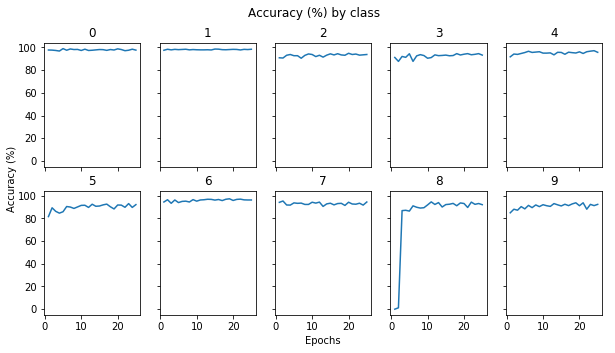

In [5]:
%matplotlib inline

from matplotlib_for_acc_by_class import plot

plot(10, len(test_accuracy), acc_by_class)

Mostrando agora a acurácia total temos o seguinte:

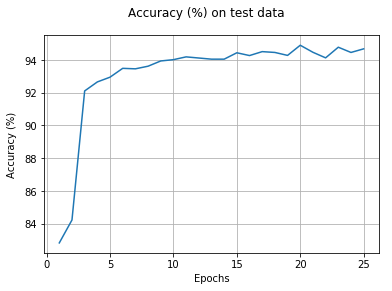

In [6]:
%matplotlib inline

from matplotlib_for_total_acc import plot

accuracy = [float(acc/100) for acc in test_accuracy]

plot(10, len(accuracy), accuracy)

Agora que já estamos munidos de dados suficientes, iremos realizar testes com outros valores para a taxa de aprendizado $\eta$ . Primeiro colocaremos um valor menor, neste caso $\eta = 2.0$

## Dia 2:

In [1]:
import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()

In [2]:
import network
from timeit import default_timer as timer
net = network.Network([784,30,10])
start = timer()
test_accuracy, acc_by_class = net.SGD(training_data, 5, 10, 2.0, test_data=test_data)
end = timer()
print("\nElapsed time: " + \
    str(int((end - start) // 60)) + "min " + str(round((end - start) % 60, 2)) + "s")

Epoch 1: 8896 / 10000
Epoch 2: 9159 / 10000
Epoch 3: 9208 / 10000
Epoch 4: 9260 / 10000
Epoch 5: 9314 / 10000
Epoch 6: 9360 / 10000
Epoch 7: 9364 / 10000
Epoch 8: 9387 / 10000
Epoch 9: 9395 / 10000
Epoch 10: 9393 / 10000
Epoch 11: 9421 / 10000
Epoch 12: 9437 / 10000
Epoch 13: 9455 / 10000
Epoch 14: 9438 / 10000
Epoch 15: 9454 / 10000
Epoch 16: 9462 / 10000
Epoch 17: 9426 / 10000
Epoch 18: 9453 / 10000
Epoch 19: 9460 / 10000
Epoch 20: 9477 / 10000
Epoch 21: 9461 / 10000
Epoch 22: 9466 / 10000
Epoch 23: 9481 / 10000
Epoch 24: 9481 / 10000
Epoch 25: 9476 / 10000
Epoch 26: 9481 / 10000
Epoch 27: 9490 / 10000
Epoch 28: 9466 / 10000
Epoch 29: 9490 / 10000
Epoch 30: 9485 / 10000
Epoch 31: 9489 / 10000
Epoch 32: 9483 / 10000
Training complete after 32 epochs.
Best total accuracy: 9490

Elapsed time: 5min 6.51s


Apesar de ainda não haver plotado os gráficos com as acurácias já podemos notar que a nossa escolha para o valor de $\eta$ não foi das melhores, portanto faremos outro teste só que dessa vez com o valor de $\eta$ maior do que o inicial. Faremos então $\eta = 4.0$ .

In [1]:
import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()

In [2]:
import network
from timeit import default_timer as timer
net = network.Network([784,30,10])
start = timer()
test_accuracy, acc_by_class = net.SGD(training_data, 5, 10, 4.0, test_data=test_data)
end = timer()
print("\nElapsed time: " + \
    str(int((end - start) // 60)) + "min " + str(round((end - start) % 60, 2)) + "s")

Epoch 1: 9073 / 10000
Epoch 2: 9179 / 10000
Epoch 3: 9303 / 10000
Epoch 4: 9287 / 10000
Epoch 5: 9391 / 10000
Epoch 6: 9403 / 10000
Epoch 7: 9408 / 10000
Epoch 8: 9420 / 10000
Epoch 9: 9416 / 10000
Epoch 10: 9428 / 10000
Epoch 11: 9405 / 10000
Epoch 12: 9420 / 10000
Epoch 13: 9455 / 10000
Epoch 14: 9437 / 10000
Epoch 15: 9453 / 10000
Epoch 16: 9438 / 10000
Epoch 17: 9436 / 10000
Epoch 18: 9473 / 10000
Epoch 19: 9456 / 10000
Epoch 20: 9474 / 10000
Epoch 21: 9506 / 10000
Epoch 22: 9476 / 10000
Epoch 23: 9464 / 10000
Epoch 24: 9480 / 10000
Epoch 25: 9490 / 10000
Epoch 26: 9480 / 10000
Training complete after 26 epochs.
Best total accuracy: 9506

Elapsed time: 4min 0.91s


Sem plotar os gráficos já temos uma melhora, tendo em conta que foi atingido uma melhor acurácia total maior do que a inicial com $\eta = 3.0$, agora plotaremos os gŕaficos e compararemos com os resultados anteriores.

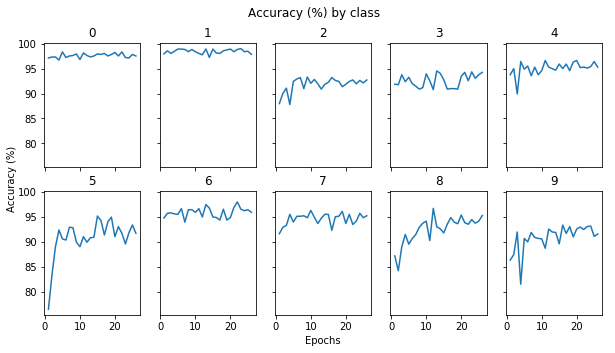

In [3]:
%matplotlib inline

from matplotlib_for_acc_by_class import plot

plot(10, len(test_accuracy), acc_by_class)

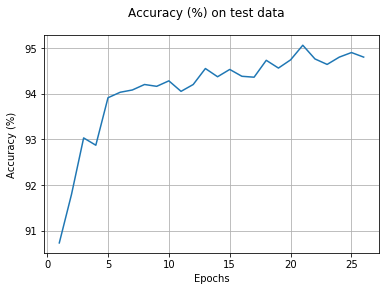

In [4]:
%matplotlib inline

from matplotlib_for_total_acc import plot

accuracy = [float(acc/100) for acc in test_accuracy]

plot(10, len(accuracy), accuracy)

Salvando os resultados em um arquivo:

In [5]:
test_accuracy = list(test_accuracy)
acc_by_class = [list(a) for a in acc_by_class]

import saving_data as sd
sd.save_data("saved_accuracies_official_test2.json", test_accuracy, acc_by_class,\
                len(test_accuracy), 5, 10, 4.0)

Agora tentaremos plotar uma sobreposição dos dois gráficos da acurácia total e avaliaremos se a escolha do $\eta$ foi boa ou não.

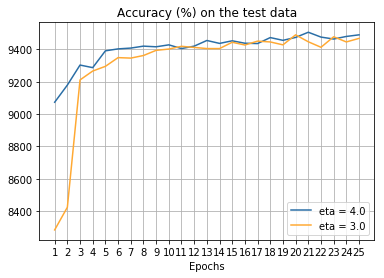

In [7]:
from matplotlib_for_total_acc_2 import plot
import json

# Loading results from a file
def load_data(filename):
    f = open(filename, "r")
    data = json.load(f)
    f.close()
    return data
#*************************************

accuracy = []

data_test1 = load_data("saved_accuracies_official_test1.json")
data_test2 = load_data("saved_accuracies_official_test2.json")


# In this part we're slicing one of the lists so they can be on the same plot
if (len(data_test1["test_accuracy"]) > len(data_test2["test_accuracy"])):
    accuracy = [data_test1["test_accuracy"][:len(data_test2["test_accuracy"])]]
    accuracy.append(data_test2["test_accuracy"])
    plot(len(accuracy), len(accuracy[0]), accuracy, \
         [('eta = 3.0','#FFA933'), \
          ('eta = 4.0','#2A6EA6')])

else:
    accuracy = [data_test2["test_accuracy"][:len(data_test1["test_accuracy"])]]
    accuracy.append(data_test1["test_accuracy"])
    plot(len(accuracy), len(accuracy[0]), accuracy, \
         [('eta = 4.0','#2A6EA6'), \
          ('eta = 3.0','#FFA933')])

Com essa imagem das duas curvas sobrepostas podemos ver claramente que a curva onde $\eta = 4.0$ tem uma vantagem com relação à com $\eta = 3.0$ . Portanto estamos no caminho certo para encontrar um valor melhor para $\eta$ .

## Dia 3:

Faremos agora outro teste dessa vez com $\eta = 5.0$

In [1]:
import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()

In [2]:
import network
from timeit import default_timer as timer
net = network.Network([784,30,10])
start = timer()
test_accuracy, acc_by_class = net.SGD(training_data, 5, 10, 5.0, test_data=test_data)
end = timer()
print("\nElapsed time: " + \
    str(int((end - start) // 60)) + "min " + str(round((end - start) % 60, 2)) + "s")

Epoch 1: 8175 / 10000
Epoch 2: 9066 / 10000
Epoch 3: 9268 / 10000
Epoch 4: 9258 / 10000
Epoch 5: 9374 / 10000
Epoch 6: 9402 / 10000
Epoch 7: 9385 / 10000
Epoch 8: 9409 / 10000
Epoch 9: 9443 / 10000
Epoch 10: 9386 / 10000
Epoch 11: 9430 / 10000
Epoch 12: 9436 / 10000
Epoch 13: 9441 / 10000
Epoch 14: 9454 / 10000
Epoch 15: 9480 / 10000
Epoch 16: 9438 / 10000
Epoch 17: 9449 / 10000
Epoch 18: 9453 / 10000
Epoch 19: 9466 / 10000
Epoch 20: 9497 / 10000
Epoch 21: 9470 / 10000
Epoch 22: 9495 / 10000
Epoch 23: 9492 / 10000
Epoch 24: 9485 / 10000
Epoch 25: 9503 / 10000
Epoch 26: 9522 / 10000
Epoch 27: 9512 / 10000
Epoch 28: 9475 / 10000
Epoch 29: 9482 / 10000
Epoch 30: 9522 / 10000
Epoch 31: 9498 / 10000
Training complete after 31 epochs.
Best total accuracy: 9522

Elapsed time: 4min 9.77s


Novamente tivemos uma melhora. Plotaremos de novo os gráficos referentes a tal melhora.

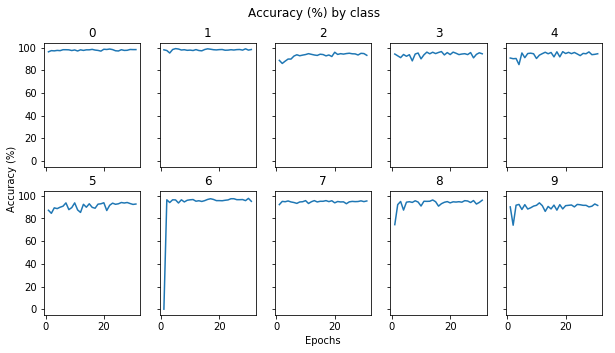

In [3]:
%matplotlib inline

from matplotlib_for_acc_by_class import plot

plot(10, len(test_accuracy), acc_by_class)

Gravando em um arquivo:

In [4]:
test_accuracy = list(test_accuracy)
acc_by_class = [list(a) for a in acc_by_class]

import saving_data as sd
sd.save_data("saved_accuracies_official_test3.json", test_accuracy, acc_by_class,\
                len(test_accuracy), 5, 10, 5.0)

Plotando os gráficos sobrepostos:

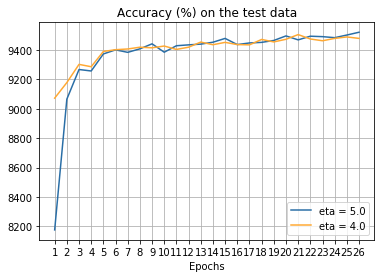

In [5]:
from matplotlib_for_total_acc_2 import plot
import json

# Loading results from a file
def load_data(filename):
    f = open(filename, "r")
    data = json.load(f)
    f.close()
    return data
#*************************************

accuracy = []

data_test1 = load_data("saved_accuracies_official_test2.json")
data_test2 = load_data("saved_accuracies_official_test3.json")


# In this part we're slicing one of the lists so they can be on the same plot
if (len(data_test1["test_accuracy"]) > len(data_test2["test_accuracy"])):
    accuracy = [data_test1["test_accuracy"][:len(data_test2["test_accuracy"])]]
    accuracy.append(data_test2["test_accuracy"])
    plot(len(accuracy), len(accuracy[0]), accuracy, \
         [('eta = 4.0','#FFA933'), \
          ('eta = 5.0','#2A6EA6')])

else:
    accuracy = [data_test2["test_accuracy"][:len(data_test1["test_accuracy"])]]
    accuracy.append(data_test1["test_accuracy"])
    plot(len(accuracy), len(accuracy[0]), accuracy, \
         [('eta = 5.0','#2A6EA6'), \
          ('eta = 4.0','#FFA933')])

Anaisando o gráfico acima vimos que os desempenhos estão muito próximos, portanto, podemos pensar que é possível que um $\eta$ com valor melhor tenha um valor tal que $4.0\leq\eta\leq5.0$ . Consideraremos então o ponto médio desse intervalo, ou seja, $\eta = 4.5$ .

## Dia 4:

In [1]:
import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()

In [2]:
import network
from timeit import default_timer as timer
net = network.Network([784,30,10])
start = timer()
test_accuracy, acc_by_class = net.SGD(training_data, 5, 10, 4.5, test_data=test_data)
end = timer()
print("\nElapsed time: " + \
    str(int((end - start) // 60)) + "min " + str(round((end - start) % 60, 2)) + "s")

Epoch 1: 8279 / 10000
Epoch 2: 9261 / 10000
Epoch 3: 9295 / 10000
Epoch 4: 9303 / 10000
Epoch 5: 9359 / 10000
Epoch 6: 9388 / 10000
Epoch 7: 9346 / 10000
Epoch 8: 9416 / 10000
Epoch 9: 9389 / 10000
Epoch 10: 9420 / 10000
Epoch 11: 9426 / 10000
Epoch 12: 9424 / 10000
Epoch 13: 9390 / 10000
Epoch 14: 9404 / 10000
Epoch 15: 9422 / 10000
Epoch 16: 9434 / 10000
Epoch 17: 9439 / 10000
Epoch 18: 9446 / 10000
Epoch 19: 9439 / 10000
Epoch 20: 9437 / 10000
Epoch 21: 9463 / 10000
Epoch 22: 9453 / 10000
Epoch 23: 9434 / 10000
Epoch 24: 9425 / 10000
Epoch 25: 9433 / 10000
Epoch 26: 9424 / 10000
Training complete after 26 epochs.
Best total accuracy: 9463

Elapsed time: 3min 43.59s


Já que não houve melhora significativa, continuaremos aumentando o valor de $\eta$, dessa vez com $\eta = 6.0$

In [1]:
import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()

In [2]:
import network
from timeit import default_timer as timer
net = network.Network([784,30,10])
start = timer()
test_accuracy, acc_by_class = net.SGD(training_data, 5, 10, 6.0, test_data=test_data)
end = timer()
print("\nElapsed time: " + \
    str(int((end - start) // 60)) + "min " + str(round((end - start) % 60, 2)) + "s")

Epoch 1: 9106 / 10000
Epoch 2: 9241 / 10000
Epoch 3: 9254 / 10000
Epoch 4: 9341 / 10000
Epoch 5: 9378 / 10000
Epoch 6: 9430 / 10000
Epoch 7: 9438 / 10000
Epoch 8: 9472 / 10000
Epoch 9: 9451 / 10000
Epoch 10: 9497 / 10000
Epoch 11: 9488 / 10000
Epoch 12: 9475 / 10000
Epoch 13: 9515 / 10000
Epoch 14: 9460 / 10000
Epoch 15: 9488 / 10000
Epoch 16: 9480 / 10000
Epoch 17: 9484 / 10000
Epoch 18: 9496 / 10000
Training complete after 18 epochs.
Best total accuracy: 9515

Elapsed time: 2min 27.55s


Apesar de não haver alcançado a acurácia geral máxima do $\eta = 4.0$, com $\eta = 6.0$ chegamos mais rápido a um ponto bem parecido. Compararemos então as acurácias plotando os gráficos, mas antes vamos salvar o progresso nem um arquivo, como de costume.

In [3]:
test_accuracy = list(test_accuracy)
acc_by_class = [list(a) for a in acc_by_class]

import saving_data as sd
sd.save_data("saved_accuracies_official_test4.json", test_accuracy, acc_by_class,\
                len(test_accuracy), 5, 10, 6.0)

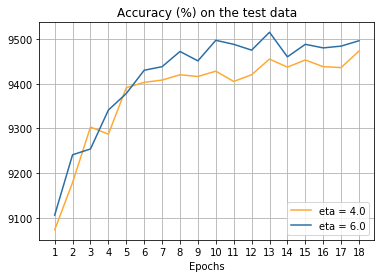

In [4]:
from matplotlib_for_total_acc_2 import plot
import json

# Loading results from a file
def load_data(filename):
    f = open(filename, "r")
    data = json.load(f)
    f.close()
    return data
#*************************************

accuracy = []

data_test1 = load_data("saved_accuracies_official_test2.json")
data_test2 = load_data("saved_accuracies_official_test4.json")


# In this part we're slicing one of the lists so they can be on the same plot
if (len(data_test1["test_accuracy"]) > len(data_test2["test_accuracy"])):
    accuracy = [data_test1["test_accuracy"][:len(data_test2["test_accuracy"])]]
    accuracy.append(data_test2["test_accuracy"])
    plot(len(accuracy), len(accuracy[0]), accuracy, \
         [('eta = 4.0','#FFA933'), \
          ('eta = 6.0','#2A6EA6')])

else:
    accuracy = [data_test2["test_accuracy"][:len(data_test1["test_accuracy"])]]
    accuracy.append(data_test1["test_accuracy"])
    plot(len(accuracy), len(accuracy[0]), accuracy, \
         [('eta = 6.0','#2A6EA6'), \
          ('eta = 4.0','#FFA933')])

Bom, o que vemos no gráfico já é suficiente para induzirmos que a rede treinada com $\eta = 6.0$ atingiu um resultado melhor em um número menor de épocas, portanto, iremos tomá-la como referência a partir de agora e continuaremos nossa busca pela taxa de aprendizagem $\eta$ perfeita. Usaremos agora $\eta = 7.0$.

In [6]:
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
start = timer()
test_accuracy, acc_by_class = net.SGD(training_data, 5, 10, 7.0, test_data=test_data)
end = timer()
print("\nElapsed time: " + \
    str(int((end - start) // 60)) + "min " + str(round((end - start) % 60, 2)) + "s")

Epoch 1: 9478 / 10000
Epoch 2: 9483 / 10000
Epoch 3: 9484 / 10000
Epoch 4: 9503 / 10000
Epoch 5: 9494 / 10000
Epoch 6: 9487 / 10000
Epoch 7: 9543 / 10000
Epoch 8: 9454 / 10000
Epoch 9: 9524 / 10000
Epoch 10: 9528 / 10000
Epoch 11: 9516 / 10000
Epoch 12: 9530 / 10000
Training complete after 12 epochs.
Best total accuracy: 9543

Elapsed time: 1min 36.64s


Desta vez podemos ver uma boa melhora novamente. Contudo, podemos notar que nossa rede está estagnando cada vez mais rápido, isto é, durando menos épocas. Isso não necessariamente é um problema se levarmos em conta que nosso critério de parada foi baixo justamnete para que fosse possível fazer testes mais rápidos. Novamente salvaremos os resultados e plotaremos os gráficos comparando as duas performances.

In [7]:
test_accuracy = list(test_accuracy)
acc_by_class = [list(a) for a in acc_by_class]

import saving_data as sd
sd.save_data("saved_accuracies_official_test5.json", test_accuracy, acc_by_class,\
                len(test_accuracy), 5, 10, 7.0)

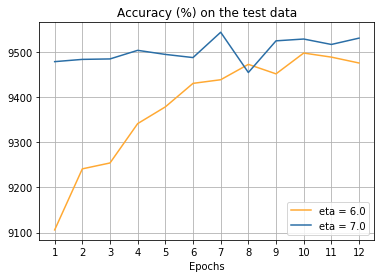

In [8]:
from matplotlib_for_total_acc_2 import plot
import json

# Loading results from a file
def load_data(filename):
    f = open(filename, "r")
    data = json.load(f)
    f.close()
    return data
#*************************************

accuracy = []

data_test1 = load_data("saved_accuracies_official_test4.json")
data_test2 = load_data("saved_accuracies_official_test5.json")


# In this part we're slicing one of the lists so they can be on the same plot
if (len(data_test1["test_accuracy"]) > len(data_test2["test_accuracy"])):
    accuracy = [data_test1["test_accuracy"][:len(data_test2["test_accuracy"])]]
    accuracy.append(data_test2["test_accuracy"])
    plot(len(accuracy), len(accuracy[0]), accuracy, \
         [('eta = 6.0','#FFA933'), \
          ('eta = 7.0','#2A6EA6')])

else:
    accuracy = [data_test2["test_accuracy"][:len(data_test1["test_accuracy"])]]
    accuracy.append(data_test1["test_accuracy"])
    plot(len(accuracy), len(accuracy[0]), accuracy, \
         [('eta = 7.0','#2A6EA6'), \
          ('eta = 6.0','#FFA933')])

Podemos ver claramente que a curva $\eta = 7.0$ está sobre a do $\eta = 6.0$. Novamente houve progresso. Continuaremos com nosso roteiro e repetiremos o teste com $\eta = 8.0$.

In [9]:
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
start = timer()
test_accuracy, acc_by_class = net.SGD(training_data, 5, 10, 8.0, test_data=test_data)
end = timer()
print("\nElapsed time: " + \
    str(int((end - start) // 60)) + "min " + str(round((end - start) % 60, 2)) + "s")

Epoch 1: 9532 / 10000
Epoch 2: 9521 / 10000
Epoch 3: 9477 / 10000
Epoch 4: 9479 / 10000
Epoch 5: 9518 / 10000
Epoch 6: 9525 / 10000
Training complete after 6 epochs.
Best total accuracy: 9532

Elapsed time: 0min 48.69s


Notamos que as épocas ficam cada vez menores enquanto avançamos. Supõe-se que seja devido a um fenômeno chamado *overshooting* que é devido a um valor de $\eta$ alto que faz com que, ao encontrar um ponto de mínimo local da função custo, pelo valor de $\eta$ ser alto ele pode ficar oscilando em torno desse mínimo local. Continuaremos com os nossos testes agora com $\eta = 9.0$ e veremos como se obtemos progresso.

In [10]:
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
start = timer()
test_accuracy, acc_by_class = net.SGD(training_data, 5, 10, 9.0, test_data=test_data)
end = timer()
print("\nElapsed time: " + \
    str(int((end - start) // 60)) + "min " + str(round((end - start) % 60, 2)) + "s")

Epoch 1: 9494 / 10000
Epoch 2: 9498 / 10000
Epoch 3: 9483 / 10000
Epoch 4: 9462 / 10000
Epoch 5: 9488 / 10000
Epoch 6: 9478 / 10000
Epoch 7: 9490 / 10000
Training complete after 7 epochs.
Best total accuracy: 9498

Elapsed time: 0min 57.56s


Temos mais uma evidência de que nosso valor de $\eta$ está alto. Para ter certeza desse fato faremos $\eta = 10.0$

In [11]:
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
start = timer()
test_accuracy, acc_by_class = net.SGD(training_data, 5, 10, 10.0, test_data=test_data)
end = timer()
print("\nElapsed time: " + \
    str(int((end - start) // 60)) + "min " + str(round((end - start) % 60, 2)) + "s")

Epoch 1: 9486 / 10000
Epoch 2: 9440 / 10000
Epoch 3: 9475 / 10000
Epoch 4: 9530 / 10000
Epoch 5: 9513 / 10000
Epoch 6: 9474 / 10000
Epoch 7: 9503 / 10000
Epoch 8: 9468 / 10000
Epoch 9: 9526 / 10000
Training complete after 9 epochs.
Best total accuracy: 9530

Elapsed time: 1min 13.46s


Bom, agora temos certeza de que nossa análise estava correta, visto que os últimos experimentos pararam em um número de épocas inferior a 10. Agora voltaremos ao ponto $\eta = 6.0$ e repetiremos o teste para avaliarmos se é uma escolha melhor do que $\eta = 4.0$, já que, apesar de a acurácia ter superado a com $\eta = 4.0$, a rede estagnou mais rápido.

In [12]:
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
start = timer()
test_accuracy, acc_by_class = net.SGD(training_data, 5, 10, 6.0, test_data=test_data)
end = timer()
print("\nElapsed time: " + \
    str(int((end - start) // 60)) + "min " + str(round((end - start) % 60, 2)) + "s")

Epoch 1: 9564 / 10000
Epoch 2: 9541 / 10000
Epoch 3: 9554 / 10000
Epoch 4: 9557 / 10000
Epoch 5: 9528 / 10000
Epoch 6: 9546 / 10000
Training complete after 6 epochs.
Best total accuracy: 9564

Elapsed time: 0min 48.89s


Notamos que, apesar de superar a rede treinada com $\eta = 4.0$ em termos de acurácia, a rede estagna muito mais rápido, o que evidencia o fenômeno *overshooting*. Agora que encontramos um novo ponto referência ($\eta = 4.0$) tentaremos um $\eta$ tal que $3.0\leq\eta\leq4.0$ tal como $\eta = 3.5$.

In [13]:
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
start = timer()
test_accuracy, acc_by_class = net.SGD(training_data, 5, 10, 3.5, test_data=test_data)
end = timer()
print("\nElapsed time: " + \
    str(int((end - start) // 60)) + "min " + str(round((end - start) % 60, 2)) + "s")

Epoch 1: 9578 / 10000
Epoch 2: 9576 / 10000
Epoch 3: 9578 / 10000
Epoch 4: 9576 / 10000
Epoch 5: 9590 / 10000
Epoch 6: 9576 / 10000
Epoch 7: 9600 / 10000
Epoch 8: 9583 / 10000
Epoch 9: 9583 / 10000
Epoch 10: 9578 / 10000
Epoch 11: 9588 / 10000
Epoch 12: 9581 / 10000
Training complete after 12 epochs.
Best total accuracy: 9600

Elapsed time: 1min 39.52s


Aqui já podemos ver uma melhora mais do que significativa em termos de acurácia. Contudo, há um porém, como os pesos e os ajustes são iniciados de forma aleatória na rede, pode ser que, nesse teste, a rede "tenha tido sorte" e ocasionalmente chegado a um ponto melhor. Repetiremos o teste.

In [14]:
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
start = timer()
test_accuracy, acc_by_class = net.SGD(training_data, 5, 10, 3.5, test_data=test_data)
end = timer()
print("\nElapsed time: " + \
    str(int((end - start) // 60)) + "min " + str(round((end - start) % 60, 2)) + "s")

Epoch 1: 9581 / 10000
Epoch 2: 9593 / 10000
Epoch 3: 9579 / 10000
Epoch 4: 9567 / 10000
Epoch 5: 9578 / 10000
Epoch 6: 9582 / 10000
Epoch 7: 9570 / 10000
Training complete after 7 epochs.
Best total accuracy: 9593

Elapsed time: 0min 58.02s


Agora verificamos que não foi sorte. A rede realmente tem maior performance em termos de acurácia do que a anterior. Inclusive sempre inicializando em um ponto melhor do que quando $\eta = 4.0$. Refinaremos ainda mais esse resultado testando um valor para $\eta$ tal que $3.0\leq\eta\leq4.0$, ou seja, $\eta = 3.25$.

In [16]:
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
start = timer()
test_accuracy, acc_by_class = net.SGD(training_data, 5, 10, 3.25, test_data=test_data)
end = timer()
print("\nElapsed time: " + \
    str(int((end - start) // 60)) + "min " + str(round((end - start) % 60, 2)) + "s")

Epoch 1: 9582 / 10000
Epoch 2: 9578 / 10000
Epoch 3: 9583 / 10000
Epoch 4: 9570 / 10000
Epoch 5: 9573 / 10000
Epoch 6: 9582 / 10000
Epoch 7: 9584 / 10000
Epoch 8: 9583 / 10000
Epoch 9: 9576 / 10000
Epoch 10: 9583 / 10000
Epoch 11: 9584 / 10000
Epoch 12: 9584 / 10000
Training complete after 12 epochs.
Best total accuracy: 9584

Elapsed time: 1min 38.03s


Bom, não obtivemos melhora. Portanto, faremos o seguinte: agora caminharemos para o lado contrário. Isto é, dessa vez teremos um valor de $\eta$ tal que $3.5\leq\eta\leq4.0$, portanto, $\eta = 3.75$.

In [17]:
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
start = timer()
test_accuracy, acc_by_class = net.SGD(training_data, 5, 10, 3.75, test_data=test_data)
end = timer()
print("\nElapsed time: " + \
    str(int((end - start) // 60)) + "min " + str(round((end - start) % 60, 2)) + "s")

Epoch 1: 9582 / 10000
Epoch 2: 9573 / 10000
Epoch 3: 9570 / 10000
Epoch 4: 9585 / 10000
Epoch 5: 9587 / 10000
Epoch 6: 9576 / 10000
Epoch 7: 9586 / 10000
Epoch 8: 9579 / 10000
Epoch 9: 9582 / 10000
Epoch 10: 9581 / 10000
Training complete after 10 epochs.
Best total accuracy: 9587

Elapsed time: 1min 30.05s


Novamente nenhuma melhora significativa. Agora nossa referência é oficialmente $\eta = 3.5$. Fazendo mais alguns testes não feitos antes apenas para "brincar" um pouco, faremos $\eta = 1.0$.

In [18]:
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
start = timer()
test_accuracy, acc_by_class = net.SGD(training_data, 5, 10, 1.0, test_data=test_data)
end = timer()
print("\nElapsed time: " + \
    str(int((end - start) // 60)) + "min " + str(round((end - start) % 60, 2)) + "s")

Epoch 1: 9578 / 10000
Epoch 2: 9578 / 10000
Epoch 3: 9585 / 10000
Epoch 4: 9580 / 10000
Epoch 5: 9579 / 10000
Epoch 6: 9582 / 10000
Epoch 7: 9584 / 10000
Epoch 8: 9584 / 10000
Training complete after 8 epochs.
Best total accuracy: 9585

Elapsed time: 1min 6.15s


Dessa vez tivemos uma surpresa! Por pouco a escolha $\eta = 1.0$ não ultrapassou a escolha $\eta = 3.5$. Faremos com $\eta = 0.5$ e veremos se descobrimos alguma melhora.

In [19]:
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
start = timer()
test_accuracy, acc_by_class = net.SGD(training_data, 5, 10, 0.5, test_data=test_data)
end = timer()
print("\nElapsed time: " + \
    str(int((end - start) // 60)) + "min " + str(round((end - start) % 60, 2)) + "s")

Epoch 1: 9580 / 10000
Epoch 2: 9582 / 10000
Epoch 3: 9585 / 10000
Epoch 4: 9582 / 10000
Epoch 5: 9582 / 10000
Epoch 6: 9579 / 10000
Epoch 7: 9583 / 10000
Epoch 8: 9580 / 10000
Training complete after 8 epochs.
Best total accuracy: 9585

Elapsed time: 1min 8.04s


Sem melhoras significativas por enquanto... Testemos $\eta = 0.25$.

In [20]:
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
start = timer()
test_accuracy, acc_by_class = net.SGD(training_data, 5, 10, 0.25, test_data=test_data)
end = timer()
print("\nElapsed time: " + \
    str(int((end - start) // 60)) + "min " + str(round((end - start) % 60, 2)) + "s")

Epoch 1: 9581 / 10000
Epoch 2: 9581 / 10000
Epoch 3: 9582 / 10000
Epoch 4: 9581 / 10000
Epoch 5: 9580 / 10000
Epoch 6: 9583 / 10000
Epoch 7: 9582 / 10000
Epoch 8: 9583 / 10000
Epoch 9: 9581 / 10000
Epoch 10: 9581 / 10000
Epoch 11: 9584 / 10000
Epoch 12: 9581 / 10000
Epoch 13: 9584 / 10000
Epoch 14: 9579 / 10000
Epoch 15: 9583 / 10000
Epoch 16: 9581 / 10000
Training complete after 16 epochs.
Best total accuracy: 9584

Elapsed time: 2min 41.83s


Nenhuma melhora dessa vez. Bom, acredito que encontramos um ponto ótimo para trabalhar, este é onde $\eta = 3.5$. Agora apenas colocaremos o critério de parada um pouco maior para plotarmos os gráficos finais.

In [25]:
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
start = timer()
test_accuracy, acc_by_class = net.SGD(training_data, 10, 10, 3.5, test_data=test_data)
end = timer()
print("\nElapsed time: " + \
    str(int((end - start) // 60)) + "min " + str(round((end - start) % 60, 2)) + "s")

Epoch 1: 9565 / 10000
Epoch 2: 9560 / 10000
Epoch 3: 9558 / 10000
Epoch 4: 9574 / 10000
Epoch 5: 9562 / 10000
Epoch 6: 9555 / 10000
Epoch 7: 9559 / 10000
Epoch 8: 9566 / 10000
Epoch 9: 9563 / 10000
Epoch 10: 9571 / 10000
Epoch 11: 9563 / 10000
Epoch 12: 9567 / 10000
Epoch 13: 9568 / 10000
Epoch 14: 9563 / 10000
Training complete after 14 epochs.
Best total accuracy: 9574

Elapsed time: 2min 9.38s


Nesse teste final vemos que nosso ponto de referência não foi a melhor escolha. Voltamos à estaca zero e tentamos outra vez com $\eta = 4.0$

In [27]:
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
start = timer()
test_accuracy, acc_by_class = net.SGD(training_data, 10, 10, 4.0, test_data=test_data)
end = timer()
print("\nElapsed time: " + \
    str(int((end - start) // 60)) + "min " + str(round((end - start) % 60, 2)) + "s")

Epoch 1: 9554 / 10000
Epoch 2: 9564 / 10000
Epoch 3: 9562 / 10000
Epoch 4: 9543 / 10000
Epoch 5: 9546 / 10000
Epoch 6: 9561 / 10000
Epoch 7: 9555 / 10000
Epoch 8: 9561 / 10000
Epoch 9: 9553 / 10000
Epoch 10: 9551 / 10000
Epoch 11: 9553 / 10000
Epoch 12: 9556 / 10000
Training complete after 12 epochs.
Best total accuracy: 9564

Elapsed time: 1min 57.38s


Realmente a escolha de $\eta = 3.5$ é melhor do que pensávamos. Ou quem sabe $\eta = 0.75$ seria uma escolha melhor. Vamos lá!

In [30]:
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
start = timer()
test_accuracy, acc_by_class = net.SGD(training_data, 10, 10, 0.75, test_data=test_data)
end = timer()
print("\nElapsed time: " + \
    str(int((end - start) // 60)) + "min " + str(round((end - start) % 60, 2)) + "s")

Epoch 1: 9560 / 10000
Epoch 2: 9562 / 10000
Epoch 3: 9560 / 10000
Epoch 4: 9558 / 10000
Epoch 5: 9561 / 10000
Epoch 6: 9564 / 10000
Epoch 7: 9564 / 10000
Epoch 8: 9561 / 10000
Epoch 9: 9562 / 10000
Epoch 10: 9560 / 10000
Epoch 11: 9562 / 10000
Epoch 12: 9560 / 10000
Epoch 13: 9560 / 10000
Epoch 14: 9560 / 10000
Epoch 15: 9563 / 10000
Epoch 16: 9559 / 10000
Training complete after 16 epochs.
Best total accuracy: 9564

Elapsed time: 2min 37.68s
